# Proyek Analisis Data: E-Commerce
- Nama: Muhamad Syarif Fakhrezi
- Email: ms.fakhrezi@gmail.com
- Id Dicoding: muhamadsyarif

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan Harian, Mingguan, dan Bulanan? 
- Kategori Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
- Siapa Penjual Teratas yang Paling Banyak Menjual Produknya?
- Siapa Saja Penjual yang Memiliki Performa Terbaik?
- Bagaimana Demografi dan Persebaran Lokasi Pelanggan?
- RFM Analysis(Kapan Terakhir Pelangggan Melakukan Pembelian, Seberapa Sering Pelanggan Melakukan Pembelian, dan Berapa Besar Total Nilai Uang yang Digunakan Pelanggan)?
- Berdasarkan Performa RFM, Bagaimana Distribusi Kategori Pelanggan?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
product_translation_df = pd.read_csv('product_category_name_translation.csv')
product_translation_df.sample(5)

,product_category_name,product_category_name_english
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
48,livros_interesse_geral,books_general_interest
12,papelaria,stationery
40,casa_construcao,home_construction
29,pet_shop,pet_shop


### Assessing Data

#### Tabel customers_df

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak terdapat missing value dan seluruh tipe datanya sudah sesuai.

In [9]:
customers_df.duplicated().sum()

0

Tidak terdapat juga duplikasi data.

#### Tabel orders_df

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya bertipe data datetime. Selain itu terdapat nilai null/missing value pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date yang mana dikarenakan order_status nya.

In [11]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Data orders yang akan kita gunakan hanya yang berstatus 'delivered'

In [12]:
orders_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

#### Tabel order_items_df

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak terdapat missing value, dan kolom shipping_limit_date seharusnya bertipe data time, namun kita tidak akan menggunakannya pada anaisis kali ini.

In [14]:
order_items_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

In [15]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Rata-rata harga barang (price) sebesar 120.66 Euro (dilihat dari product_category_name yang memiliki bahasa portugis) dengan harga minimal 0.85 Euro dan harga maksimal 6735 Euro, dan rata-rata ongkos kirimnya (freight_value) sebesar 20 Euro dengan ongkos kirim minimal 0 Euro (gratis) dan maksimal 409.68 Euro.

Karena nilai mean dan median pada kolom 'price' memiliki perbedaan yang signifikan, kita akan coba cek apakah terdapat outlier pada kolom 'price'.

<Axes: >

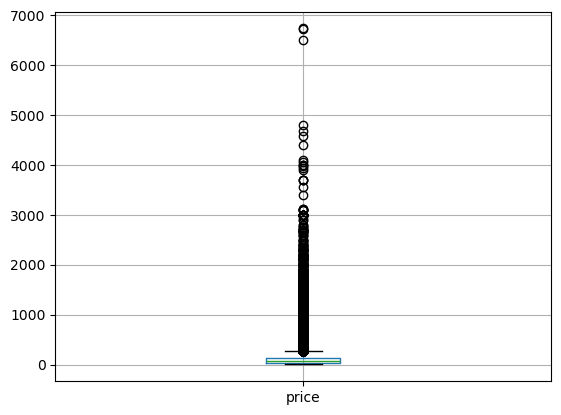

In [16]:
order_items_df.boxplot(column='price')

In [17]:
# cek data outlier pada kolom price
Q1,Q3 = order_items_df['price'].quantile(0.25), order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR
outlier_mask = (order_items_df['price'] < minimum) | (order_items_df['price'] > maximum)

outlier_price = order_items_df[outlier_mask]

outlier_price.sort_values(by='price', ascending=False).head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66


Ternyata benar, terdapat outlier pada kolom price namun kita coba verifikasi terlebih dahulu datanya, dan kita ambil 3 contoh data outliernya.

In [18]:
products_df[(products_df.product_id == '489ae2aa008f021502940f251d4cce7f') |\
            (products_df.product_id == '69c590f7ffc7bf8db97190b6cb6ed62e') |\
            (products_df.product_id == '1bdf5e6731585cf01aa8169c7028d6ad')]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
14423,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
21768,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0


In [19]:
product_translation_df[(product_translation_df.product_category_name == 'utilidades_domesticas') |\
                       (product_translation_df.product_category_name == 'artes') |\
                       (product_translation_df.product_category_name == 'pcs')]

,product_category_name,product_category_name_english
7,utilidades_domesticas,housewares
46,artes,art
53,pcs,computers


Setelah ditelusuri, berdasarkan 3 contoh produk yang termasuk outlier pada kolom price memiliki harga yang masuk akal berdasarkan product_category_name nya (housewares/peralatan rumah tangga = 6735 Euro/ sekitar 114 juta rupiah, art/seni = 6729 Euro/sekitar 114 juta rupiah, computers = 6499 Euro/sekitar 110 juta rupiah). Sehingga kita tidak perlu menghapus datanya.

#### Table order_reviews_df

In [20]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat missing value pada beberapa kolom review, namun yang akan kita gunakan hanya kolom review_score saja.  

In [21]:
order_reviews_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

In [22]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tidak terdapat keanehan pada data review_score.

#### Tabel products_df

In [23]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terdapat missing value pada kolom yang memuat keterangan produk. Sedangkan tipe datanya sudah sesuai.

In [24]:
products_df[products_df.product_category_name.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Kita cek data order salah satu produk_id yang memiliki missing value pada keterangan produknya.

In [25]:
order_items_df[order_items_df.product_id == '46b48281eb6d663ced748f324108c733']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
23024,3495e966748a04cd5d7f4537a57fa3ef,1,46b48281eb6d663ced748f324108c733,dd7ddc04e1b6c2c614352b383efe2d36,2017-09-13 22:15:15,84.9,21.43
41149,5dc05f32211efb743fde17f226adfb6b,1,46b48281eb6d663ced748f324108c733,dd7ddc04e1b6c2c614352b383efe2d36,2017-08-21 16:35:13,84.9,11.80
66687,986babaebfaa430f69a8b2e816db5f14,1,46b48281eb6d663ced748f324108c733,dd7ddc04e1b6c2c614352b383efe2d36,2017-09-12 12:04:02,84.9,21.43
66688,986babaebfaa430f69a8b2e816db5f14,2,46b48281eb6d663ced748f324108c733,dd7ddc04e1b6c2c614352b383efe2d36,2017-09-12 12:04:02,84.9,21.43
85542,c25173539a29a9b22d85fefd55e89a85,2,46b48281eb6d663ced748f324108c733,dd7ddc04e1b6c2c614352b383efe2d36,2017-07-19 12:15:12,84.9,14.02


In [26]:
order_reviews_df[order_reviews_df.order_id == '3495e966748a04cd5d7f4537a57fa3ef']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36537,4e6a50a24e9b230e57feabd319333ef4,3495e966748a04cd5d7f4537a57fa3ef,5,NaN,NaN,2017-09-21 00:00:00,2017-09-22 11:37:51


Ketika kita identifikasi terdapat pembelian terhadap produk yang tidak memiliki keterangan produk tersebut, dan mendapatkan skor ulasan/review score yang tinggi (5), maka dari itu sayang jika data-data ini dibuang. Karena product_category_name nya sangat bervariasi, daripada mengisinya dengan category yang paling banyak diorder, yang akan kita lakukan adalah mengisinya dengan product_category_name = 'unknown'/tidak diketahui.

In [27]:
products_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

#### Tabel product_translation_df

In [28]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak terdapat missing value, dan tipe datanya sudah sesuai.

In [29]:
product_translation_df.duplicated().sum()

0

Tidak terdapat duplikasi data.

### Cleaning Data

#### Tabel orders_df

In [30]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date sudah bertipe data datetime.

In [32]:
orders_df = orders_df[orders_df.order_status == 'delivered']

Mem-filter data yang hanya berstatus delivered.

#### Tabel products_df

In [33]:
products_df['product_category_name'].fillna(value='unknown', inplace=True)

Mengisi product_category_name yang kosong dengan 'unknown'

#### Tabel product_translation_df

In [34]:
unknown_category = {'product_category_name': 'unknown', 'product_category_name_english': 'unknown'}
product_translation_df.loc[len(product_translation_df)] = unknown_category

product_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


Menambahkan category = 'unknown'

## Exploratory Data Analysis (EDA)

### Menggabungkan seluruh data

In [35]:
orders_and_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df, 
    how='left', 
    left_on='order_id', 
    right_on='order_id'
)

In [36]:
all_orders_df = pd.merge(
    left=orders_and_order_items_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [37]:
customer_orders_df = pd.merge(
    left=all_orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

In [38]:
customer_order_products_df = pd.merge(
    left=customer_orders_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [39]:
all_df = pd.merge(
    left=customer_order_products_df,
    right=product_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

#### Menambahkan Kolom 'total_payment'

In [40]:
all_df['total_payment'] = all_df['price'] + all_df['freight_value']

#### Mneghapus kolom yang tidak diperlukan

In [41]:
df = all_df[['order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'product_category_name_english', 'price', 'freight_value', 'total_payment', 'seller_id', 'review_id', 'review_score', 'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']]
df.rename(columns={
    'order_purchase_timestamp':'order_date',
    'product_category_name_english':'product_category_name', 
}, inplace=True)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13952\3237500087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


,order_id,order_date,order_item_id,product_id,product_category_name,price,freight_value,total_payment,seller_id,review_id,review_score,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,housewares,29.99,8.72,38.71,3504c0cb71d7fa48d967e0e4c94d59d9,a54f0611adc9ed256b57ede6b6eb5114,4.0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,perfumery,118.70,22.76,141.46,289cdb325fb7e7f891c38608bf9e0962,8d5266042046a06655c8db133d120ba5,4.0,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,auto,159.90,19.22,179.12,4869f7a5dfa277a7dca6462dcf3b52b2,e73b67b67587f7644d5bd1a52deb1b01,5.0,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,45.00,27.20,72.20,66922902710d126a0e7d26b0e3805106,359d03e676b3c069f62cadba8dd3f6e8,5.0,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,stationery,19.90,8.72,28.62,2c9e548be18521d1c43cde1c582c6de8,e50934924e227544ba8246aeb3770dd4,5.0,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110840 entries, 0 to 110839
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110840 non-null  object        
 1   order_date                110840 non-null  datetime64[ns]
 2   order_item_id             110840 non-null  int64         
 3   product_id                110840 non-null  object        
 4   product_category_name     110818 non-null  object        
 5   price                     110840 non-null  float64       
 6   freight_value             110840 non-null  float64       
 7   total_payment             110840 non-null  float64       
 8   seller_id                 110840 non-null  object        
 9   review_id                 110013 non-null  object        
 10  review_score              110013 non-null  float64       
 11  customer_id               110840 non-null  object        
 12  cu

#### Menyimpan data untuk digunakan pada streamlit

### Explore ...

#### Jumlah Penjualan Perbulan

In [43]:
monthly_orders = df.resample(rule='M', on='order_date').order_id.nunique()

monthly_orders.index = monthly_orders.index.strftime('%B %Y') # mengubah format tanggal menjadi nama bulan
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={'order_id': 'order_count'}, inplace=True)
monthly_orders

,order_date,order_count
0,September 2016,1
1,October 2016,265
2,November 2016,0
3,December 2016,1
4,January 2017,750
5,February 2017,1653
6,March 2017,2546
7,April 2017,2303
8,May 2017,3546
9,June 2017,3135


#### Jumlah Penjualan Perminggu

In [44]:
weekly_orders = df.resample(rule='W', on='order_date').order_id.nunique()

weekly_orders.index = weekly_orders.index.strftime('%Y-%m-%d') # mengubah format tanggal menjadi nama bulan
weekly_orders = weekly_orders.reset_index()
weekly_orders.rename(columns={'order_id': 'order_count'}, inplace=True)
weekly_orders.sort_values(by='order_count', ascending=False).head()

,order_date,order_count
62,2017-11-26,2915
63,2017-12-03,2047
98,2018-08-05,2002
86,2018-05-13,1943
99,2018-08-12,1931


#### Jumlah Penjualan Perhari

In [45]:
daily_orders = df.resample(rule='D', on='order_date').order_id.nunique()

daily_orders.index = daily_orders.index.strftime('%Y-%m-%d') # mengubah format tanggal menjadi nama bulan
daily_orders = daily_orders.reset_index()
daily_orders.rename(columns={'order_id': 'order_count'}, inplace=True)
daily_orders.sort_values(by='order_count', ascending=False).head()

,order_date,order_count
435,2017-11-24,1147
436,2017-11-25,487
438,2017-11-27,395
437,2017-11-26,382
439,2017-11-28,372


#### Jumlah Penjualan Berdasarkan Kategori produk

In [46]:
df.groupby(by='product_category_name').order_id.nunique().sort_values(ascending=False).reset_index().rename(columns=({
    'order_id':'number_of_order'
})).head()

,product_category_name,number_of_order
0,bed_bath_table,9272
1,health_beauty,8647
2,sports_leisure,7530
3,computers_accessories,6530
4,furniture_decor,6307


#### Jumlah Penjualan Berdasarkan Penjual

In [47]:
df.groupby('seller_id').order_id.nunique().sort_values(ascending=False).reset_index().rename(columns={'order_id':'number_of_order'}).head()

,seller_id,number_of_order
0,6560211a19b47992c3666cc44a7e94c0,1819
1,4a3ca9315b744ce9f8e9374361493884,1772
2,cc419e0650a3c5ba77189a1882b7556a,1651
3,1f50f920176fa81dab994f9023523100,1399
4,da8622b14eb17ae2831f4ac5b9dab84a,1311


#### Penjual Teratas Berdasarkan Rata-rata Skor Review dan Jumlah Penjualan

In [48]:
top_seller = df.groupby('seller_id').agg({
    'review_score':'mean',
    'order_id':'nunique'
}).reset_index().rename(columns=({
    'order_id':'number_of_order'
}))
top_seller.sort_values(by=['review_score', 'number_of_order'],ascending=False).head()

,seller_id,review_score,number_of_order
840,48efc9d94a9834137efd9ea76b065a38,5.0,33
491,2addf05f476d0637864454e93ba673d5,5.0,12
2065,b2eecf5ea250510da76590ca79d60e5d,5.0,9
470,293dee954235e4e4e43f129313625ebe,5.0,8
473,297d5eccd19fa9a83b2630071ff105e4,5.0,8


##### Scoring

In [49]:
# perangkingan
top_seller['review_score_rank'] = top_seller['review_score'].rank(ascending=True)
top_seller['number_of_order_rank'] = top_seller['number_of_order'].rank(ascending=True)

# normalizing
top_seller['review_score_rank_normalized'] = (top_seller['review_score_rank']/top_seller['review_score_rank'].max())*100
top_seller['number_of_order_rank_normalized'] = (top_seller['number_of_order_rank']/top_seller['number_of_order_rank'].max())*100

top_seller.drop(columns=['review_score_rank', 'number_of_order_rank'], inplace=True)

# scoring
top_seller['seller_score'] = (0.60*top_seller['review_score_rank_normalized']) + (0.40*top_seller['number_of_order_rank_normalized'])
# komposisi yg digunakan 60:40

top_seller = top_seller.round(2)

top_seller.sort_values('seller_score',ascending=False).head()

,seller_id,review_score,number_of_order,review_score_rank_normalized,number_of_order_rank_normalized,seller_score
840,48efc9d94a9834137efd9ea76b065a38,5.00,33,100.00,80.57,92.23
2435,d13e50eaa47b4cbe9eb81465865d8cfc,4.81,66,87.30,89.16,88.04
2530,d9bd94811c3338dceb4181f3dbc0c73e,4.82,54,87.67,86.75,87.30
2079,b410bdd36d5db7a65dcd42b7ead933b8,4.81,42,87.36,83.79,85.93
2482,d566c37fa119d5e66c4e9052e83ee4ea,4.72,65,83.47,88.99,85.68


#### Jumlah Customer Berdasarkan City 

In [50]:
bycity = df.groupby('customer_city').customer_unique_id.nunique().reset_index().rename(columns={
    'customer_unique_id':'customer_count'})
bycity.sort_values(by='customer_count', ascending=False).head()

,customer_city,customer_count
3563,sao paulo,14528
3126,rio de janeiro,6361
449,belo horizonte,2606
553,brasilia,2013
1135,curitiba,1434


#### Jumlah Customer Berdasarkan State

In [51]:
bystate = df.groupby('customer_state').customer_unique_id.nunique().reset_index().rename(columns={
    'customer_unique_id':'customer_count'})
bystate.sort_values(by='customer_count', ascending=False).head()

,customer_state,customer_count
25,SP,39156
18,RJ,11917
10,MG,11001
22,RS,5168
17,PR,4769


#### RFM Analysis

In [52]:
rfm = df.groupby(by='customer_unique_id', as_index=False). agg({
    'order_date': 'max',
    'order_id': 'nunique',
    'total_payment': 'sum'
})
rfm.columns = ['customer_id', 'last_order', 'frequency', 'monetary']

# recency diambil dari tanggal order terakhir masuk
recent_date = df['order_date'].max() 
rfm['recency'] = rfm['last_order'].apply(lambda x: (recent_date - x).days)

rfm.drop('last_order', axis=1, inplace=True)
rfm.sort_values(by=['frequency', 'recency', 'monetary'])

,customer_id,frequency,monetary,recency
12426,21dbe8eabd00b34492a939c540e2b1a7,1,14.29,0
73840,ca36d819c1759cdb6257fef0bb5d362d,1,14.89,0
66821,b701bebbdf478f5500348f03aff62121,1,33.23,0
71672,c45221bb4573f66bdd4daf43fe2d4b3b,1,37.37,0
20009,36a5c01d940c382346247b3e6c485c2d,1,38.36,0
...,...,...,...,...
36706,6469f99c1f9dfae7733b25662e7f1782,7,758.83,62
73921,ca77025e7201e3b30c44b472ff346268,7,1122.72,89
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,196
22779,3e43e6105506432c953e165fb2acf44c,9,1172.67,182


##### RFM Scoring

In [53]:
# perangkingan berdasarkan nilai RFM
rfm['r_rank'] = rfm['recency'].rank(ascending=False)
rfm['f_rank'] = rfm['frequency'].rank(ascending=True)
rfm['m_rank'] = rfm['monetary'].rank(ascending=True)

rfm.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,70803.5,45279.0,59147.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,69825.0,45279.0,2023.5
2,0000f46a3911fa3c0805444483337064,1,86.22,536,3271.0,45279.0,36780.5
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,320,26735.0,45279.0,11427.5
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,287,31425.5,45279.0,72697.5


In [54]:
# normalizing nilai rank
rfm['r_rank_normalized'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_normalized'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_normalized'] = (rfm['m_rank']/rfm['m_rank'].max())*100

rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
rfm.head()

,customer_id,frequency,monetary,recency,r_rank_normalized,f_rank_normalized,m_rank_normalized
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,75.852224,48.500396,63.355577
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,74.803951,48.500396,2.167463
2,0000f46a3911fa3c0805444483337064,1,86.22,536,3.504242,48.500396,39.397266
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,320,28.641370,48.500396,12.240515
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,287,33.666331,48.500396,77.869599


In [55]:
# scoring
rfm['rfm_score'] = (0.20*rfm['r_rank_normalized'])+(0.40 * rfm['f_rank_normalized'])+(0.40 * rfm['m_rank_normalized'])
rfm['rfm_score'] *= 0.05
rfm = rfm.round(2)
rfm[['customer_id', 'rfm_score']].head(10)

,customer_id,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.76
2,0000f46a3911fa3c0805444483337064,1.79
3,0000f6ccb0745a6a4b88665a16c9f078,1.50
4,0004aac84e0df4da2b147fca70cf8255,2.86
5,0004bd2a26a76fe21f786e4fbd80607f,3.07
6,00050ab1314c0e55a6ca13cf7181fecf,1.81
7,00053a61a98854899e70ed204dd4bafe,3.43
8,0005e1862207bf6ccc02e4228effd9a0,2.32
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.77


RFM Scoring pada proyek ini menggunakan komposisi 20%, 40%, 40%, dengan menimbang data yang dianalisis adalah data e-commerce yang mana sebagai penyedia jasa dan aplikasi.

In [56]:
rfm.sort_values(by='rfm_score',ascending=True)

,customer_id,frequency,monetary,recency,r_rank_normalized,f_rank_normalized,m_rank_normalized,rfm_score
23181,3f4f614c632af7fc7508462a7cb55ac2,1,18.62,694,0.01,48.50,0.23,0.97
79864,da9c90677b1963eca1cf8a14c338cf6e,1,19.62,601,0.28,48.50,0.33,0.98
86835,edd1864079b2d69900cbf5c2bcb931c7,1,18.62,601,0.28,48.50,0.23,0.98
30128,527cd2850ef91088969ffbef0103dec3,1,20.62,600,0.29,48.50,0.50,0.98
1576,04544a89f79714c0abcc3ae49e884209,1,15.71,579,0.78,48.50,0.06,0.98
...,...,...,...,...,...,...,...,...
57221,9cc5a07f169a1606fd347a56683e6ea6,4,694.70,7,99.28,99.97,97.41,4.94
73127,c8460e4251689ba205045f3ea17884a1,4,4655.88,21,95.49,99.97,99.99,4.95
29112,4facc2e6fbc2bffab2fea92d2b4aa7e4,4,1760.75,15,97.11,99.97,99.68,4.96
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,8,99.02,100.00,98.39,4.96


##### Segmentasi Pelanggan Berdasarkan RFM Score

In [57]:
rfm['customer_segment'] = np.where(
    rfm['rfm_score'] > 4.5, 'Top Customers', np.where(
    rfm['rfm_score'] > 4, 'High Value Customers', np.where(
    rfm['rfm_score'] > 3, 'Medium Value Customers', np.where(
    rfm['rfm_score'] > 1.6, 'Low Value Customers',
                            'Lost Customers'))))

rfm[['customer_id', 'rfm_score', 'customer_segment']].head(10)

,customer_id,rfm_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.00,Low Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.76,Low Value Customers
2,0000f46a3911fa3c0805444483337064,1.79,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.50,Lost Customers
4,0004aac84e0df4da2b147fca70cf8255,2.86,Low Value Customers
5,0004bd2a26a76fe21f786e4fbd80607f,3.07,Medium Value Customers
6,00050ab1314c0e55a6ca13cf7181fecf,1.81,Low Value Customers
7,00053a61a98854899e70ed204dd4bafe,3.43,Medium Value Customers
8,0005e1862207bf6ccc02e4228effd9a0,2.32,Low Value Customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.77,Low Value Customers


#### Jumlah Customer Berdasarkan Segmentasi Pelanggan

In [58]:
rfm.groupby('customer_segment').customer_id.nunique().sort_values(ascending=False).reset_index()

,customer_segment,customer_id
0,Low Value Customers,60766
1,Medium Value Customers,21499
2,Lost Customers,9431
3,High Value Customers,1141
4,Top Customers,521


## Visualization & Explanatory Analysis

In [59]:
main_color = '#BE2773'
second_color = '#3B6BFF'
background_color = '#262730'
rank_colors = ["#BE2773", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730"]
rank_colors2 = ["#BE2773", "#BE2773", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730", "#262730"]
segment_colors = ["#BE2773", '#46244C', '#712B75','#C74B50', '#D49B54']

### Pertanyaan 1: Bagaimana Performa Penjualan Harian, Mingguan, dan Bulanan?

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

<Figure size 640x480 with 0 Axes>

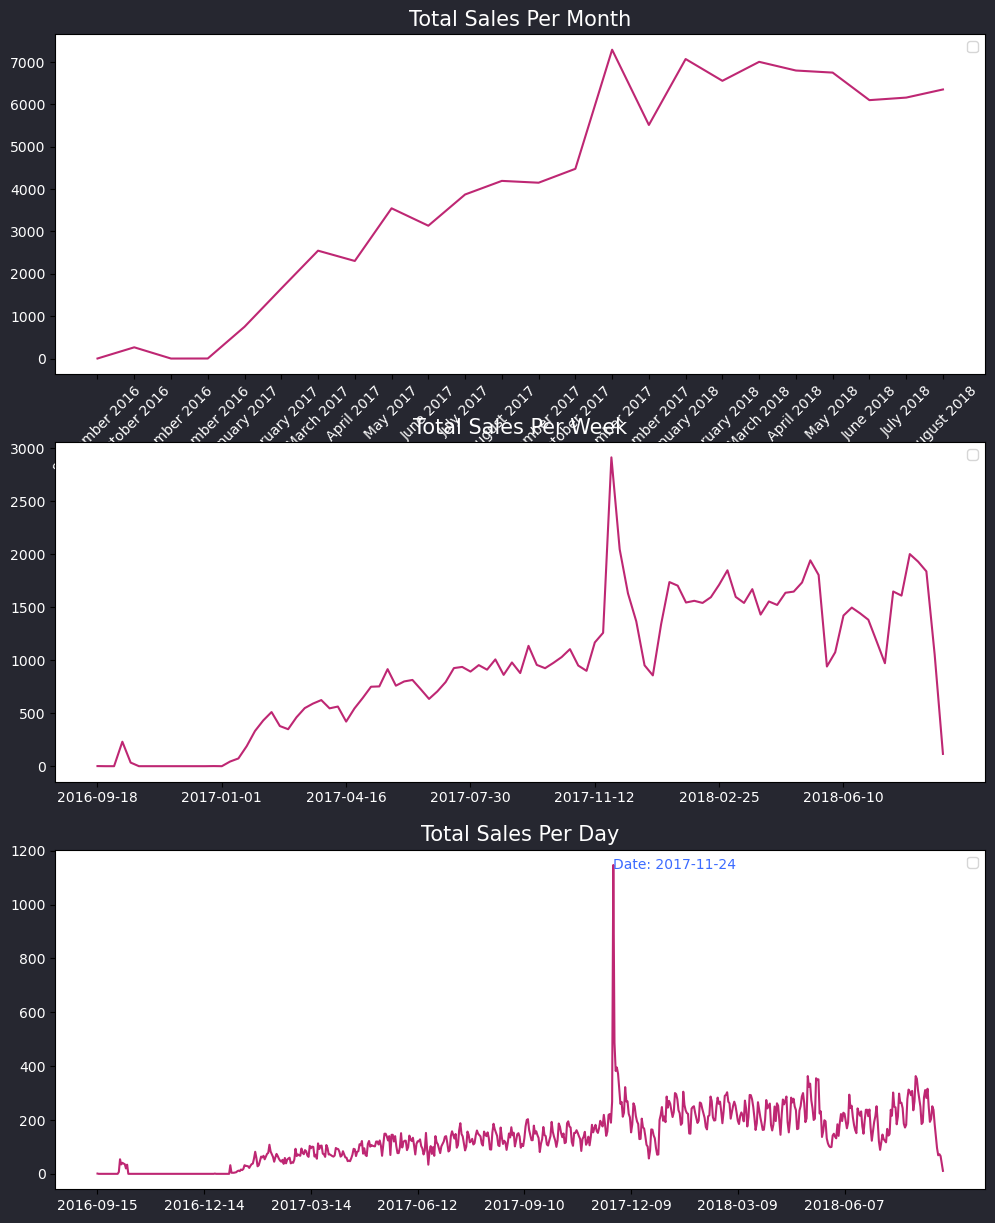

In [60]:
plt.rcParams['figure.facecolor'] = background_color
plt.tight_layout()

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

sns.lineplot(x='order_date', y='order_count', data=monthly_orders, color=main_color, ax=ax[0])
ax[0].set_xticks(monthly_orders['order_date'])
ax[0].set_xticklabels(monthly_orders['order_date'], rotation=45, color='white')
ax[0].tick_params(axis='y', labelcolor='white')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Total Sales Per Month', fontsize=15, color='white')
ax[0].legend()

sns.lineplot(x='order_date', y='order_count', data=weekly_orders, color=main_color, ax=ax[1])
ax[1].set_xticks(range(0, len(weekly_orders['order_date']), 15))
ax[1].set_xticklabels(weekly_orders['order_date'][::15], color='white')
ax[1].tick_params(axis='y', labelcolor='white')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title('Total Sales Per Week', fontsize=15, color='white')
ax[1].legend()

# daily
max_index = daily_orders['order_count'].idxmax()
max_date = daily_orders['order_date'].iloc[max_index]

sns.lineplot(x='order_date', y='order_count', data=daily_orders, color=main_color, ax=ax[2])
ax[2].set_xticks(range(0, len(daily_orders['order_date']), 90))
ax[2].set_xticklabels(daily_orders['order_date'][::90], color='white')
ax[2].text(max_date, daily_orders['order_count'].iloc[max_index],
         f'Date: {daily_orders["order_date"].iloc[max_index]}',
         fontsize=10, color=second_color, va='center')
ax[2].tick_params(axis='y', labelcolor='white')
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_title('Total Sales Per Day', fontsize=15, color='white')
ax[2].legend()

plt.show()

### Pertanyaan 2: Kategori Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [61]:
number_of_product_sold = df.groupby(by='product_category_name').order_id.nunique().reset_index().rename(columns=({
    'order_id':'number_of_order'
}))
number_of_product_sold.sort_values(by='number_of_order',ascending=False)

,product_category_name,number_of_order
7,bed_bath_table,9272
43,health_beauty,8647
65,sports_leisure,7530
15,computers_accessories,6530
39,furniture_decor,6307
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,13
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,7


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

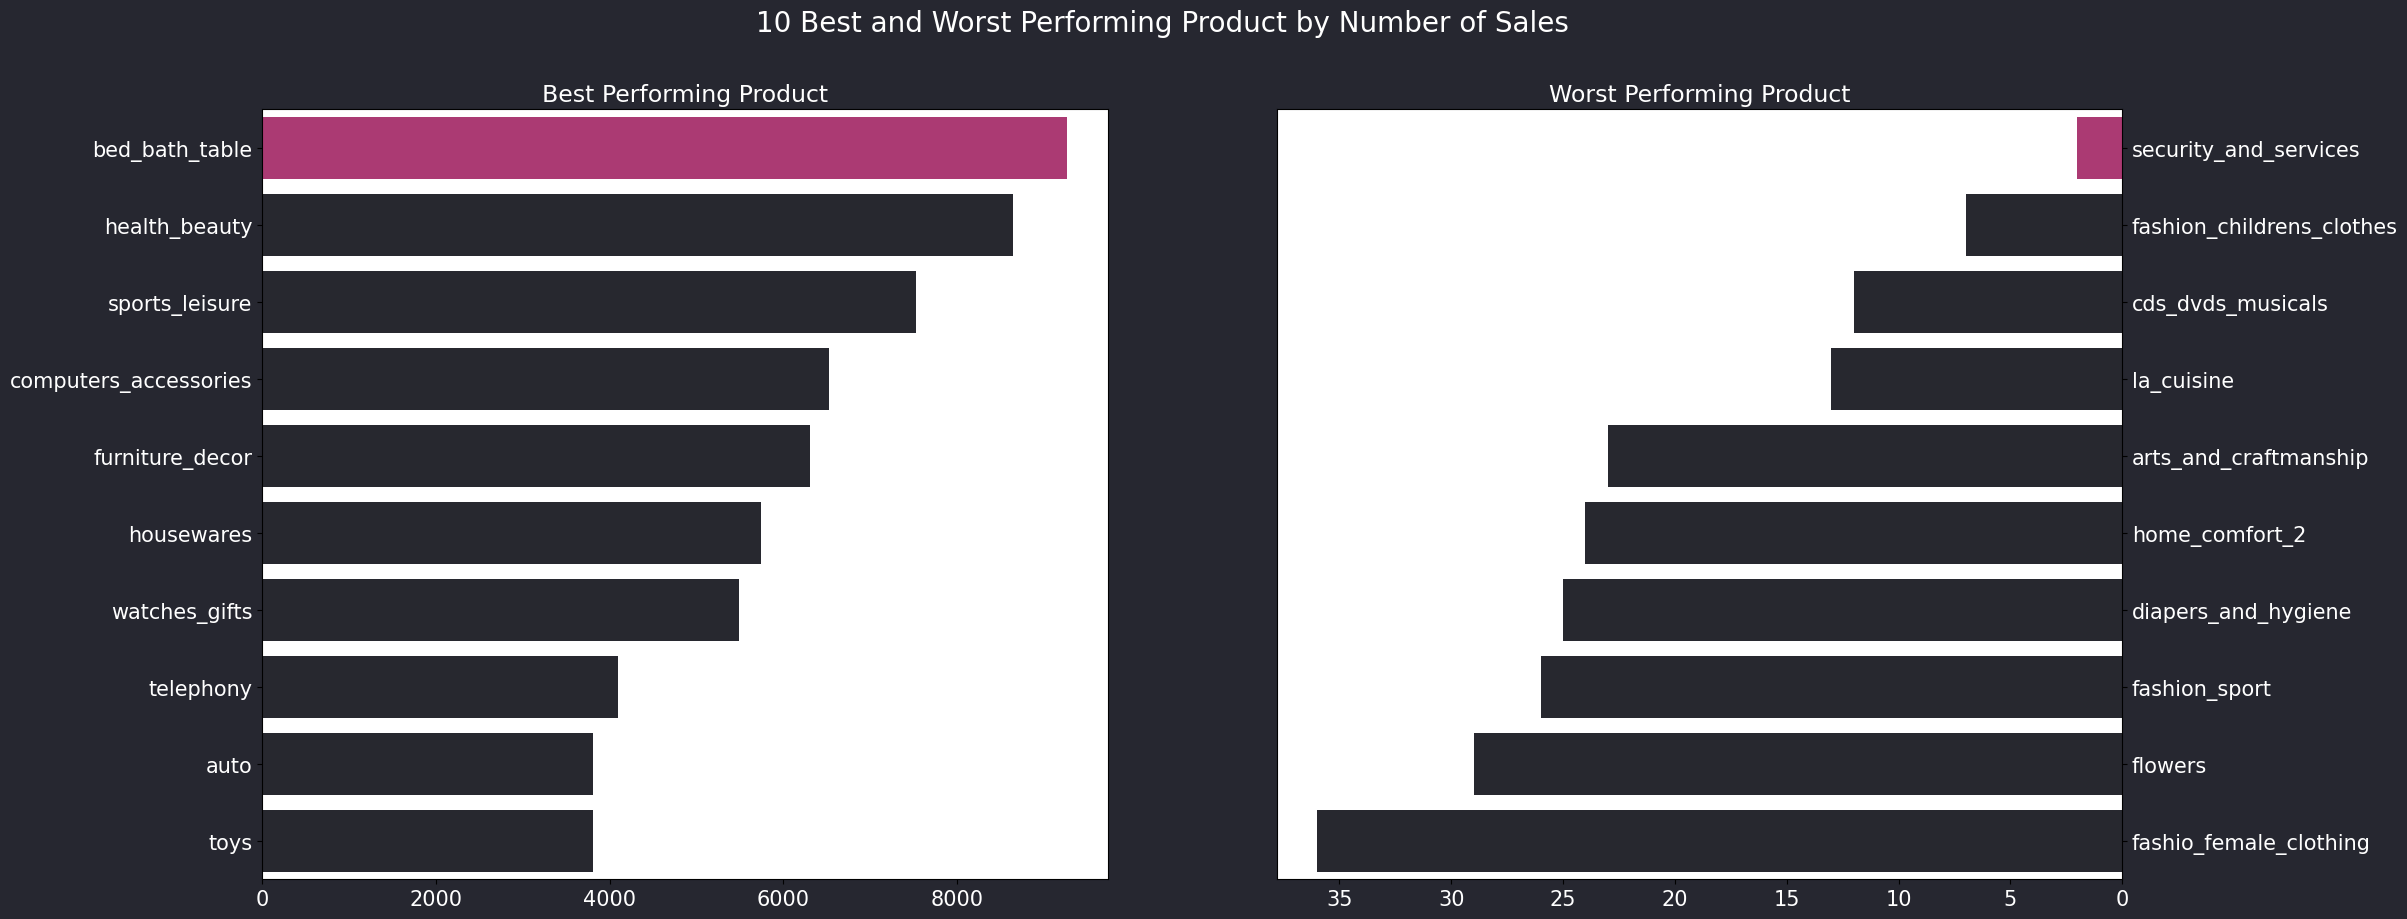

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,10))

sns.barplot(x="number_of_order", y="product_category_name", data=number_of_product_sold.sort_values(by="number_of_order", ascending=False).head(10), palette=rank_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=17, color='white')
ax[0].tick_params(axis ='y', labelsize=15, labelcolor='white')
ax[0].tick_params(axis ='x', labelsize=15, labelcolor='white')
 
sns.barplot(x="number_of_order", y="product_category_name", data=number_of_product_sold.sort_values(by="number_of_order", ascending=True).head(10), palette=rank_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=17, color='white')
ax[1].tick_params(axis='y', labelsize=15, labelcolor='white')
ax[1].tick_params(axis='x', labelsize=15, labelcolor='white') 

plt.suptitle("10 Best and Worst Performing Product by Number of Sales", fontsize=20, color='white')
plt.show()

### Pertanyaan 3: Siapa Penjual Teratas yang Paling Banyak Menjual Produknya?

In [63]:
byseller = df.groupby('seller_id').order_id.nunique().reset_index().rename(columns={'order_id':'number_of_order'})
byseller.sort_values('number_of_order', ascending=False).head()

,seller_id,number_of_order
1190,6560211a19b47992c3666cc44a7e94c0,1819
858,4a3ca9315b744ce9f8e9374361493884,1772
2388,cc419e0650a3c5ba77189a1882b7556a,1651
358,1f50f920176fa81dab994f9023523100,1399
2543,da8622b14eb17ae2831f4ac5b9dab84a,1311


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


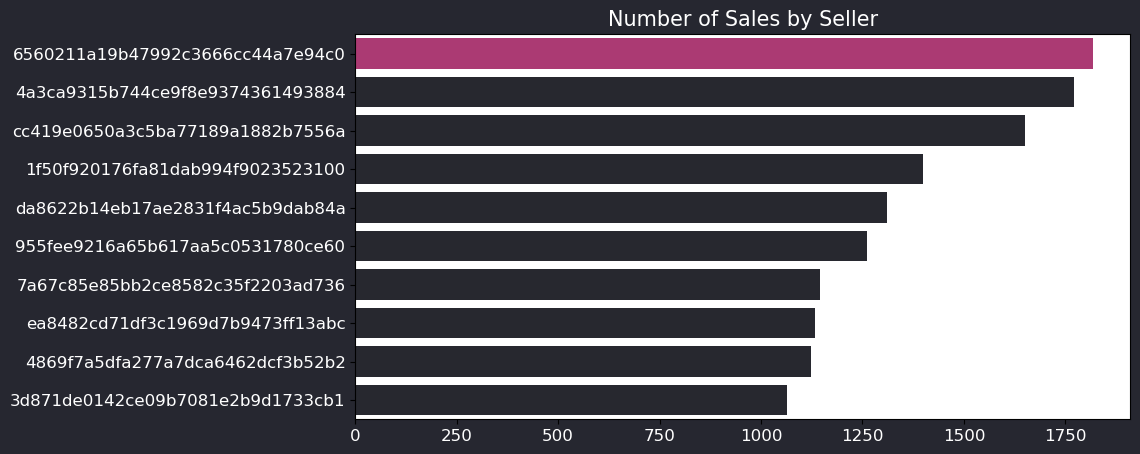

In [64]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="number_of_order", 
    y="seller_id",
    data=byseller.sort_values(by="number_of_order", ascending=False).head(10),
    palette=rank_colors
)
plt.title("Number of Sales by Seller", loc="center", fontsize=15, color='white')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12, labelcolor='white')
plt.tick_params(axis='x', labelsize=12, labelcolor='white')

plt.show()

### Pertanyaan 4: Siapa Saja Penjual yang Memiliki Performa Terbaik?

In [65]:
top_seller['rank'] = top_seller['seller_score'].rank(ascending=False)

seller_rank = top_seller[['seller_id', 'review_score', 'number_of_order', 'rank']]
seller_rank.rename(columns={'review_score': 'average_review_score', 'number_of_order':'number_of_sales'}, inplace=True)

seller_rank.sort_values('rank', ascending=True).head(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13952\3813576230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_rank.rename(columns={'review_score': 'average_review_score', 'number_of_order':'number_of_sales'}, inplace=True)


,seller_id,average_review_score,number_of_sales,rank
840,48efc9d94a9834137efd9ea76b065a38,5.00,33,1.0
2435,d13e50eaa47b4cbe9eb81465865d8cfc,4.81,66,2.0
2530,d9bd94811c3338dceb4181f3dbc0c73e,4.82,54,3.0
2079,b410bdd36d5db7a65dcd42b7ead933b8,4.81,42,4.0
2482,d566c37fa119d5e66c4e9052e83ee4ea,4.72,65,5.0
491,2addf05f476d0637864454e93ba673d5,5.00,12,6.0
1068,5a93f3ab0ef4c84ed5e1b5dbf23978bc,4.81,38,7.0
1998,ac3508719a1d8f5b7614b798f70af136,4.64,101,8.0
33,02f5837340d7eb4f653d676c7256523a,4.83,30,9.0
1564,83e197e95a1bbabc8c75e883ed016c47,4.74,46,10.0


### Pertanyaan 5: Bagaimana Demografi dan Persebaran Lokasi Pelanggan?

#### Jumlah Customer berdasarkan City dan State

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

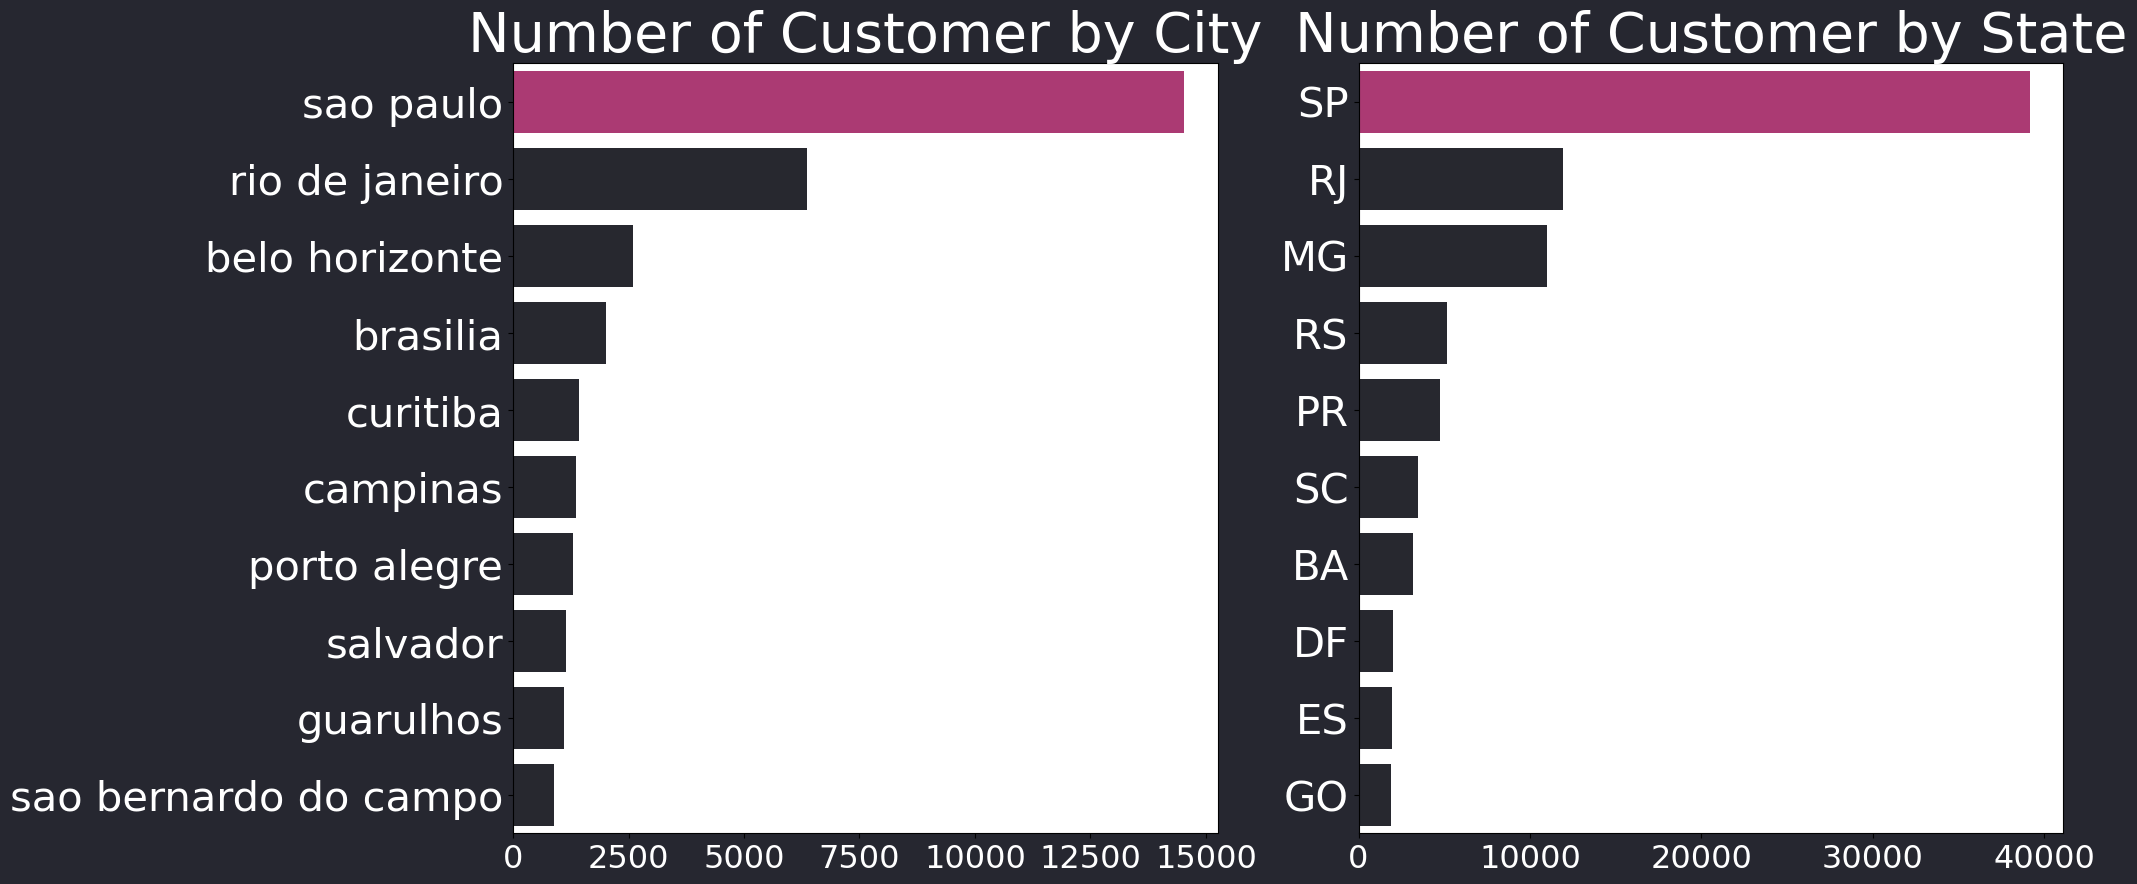

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.barplot(x='customer_count', y='customer_city', data=bycity.sort_values(by='customer_count', ascending=False).head(10), palette=rank_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Number of Customer by City', loc='center', fontsize=40, color='white')
ax[0].tick_params(axis = 'x', labelsize=23, labelcolor='white')
ax[0].tick_params(axis = 'y', labelsize=30, labelcolor='white')
 
sns.barplot(x='customer_count', y='customer_state', data=bystate.sort_values(by='customer_count', ascending=False).head(10), palette=rank_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Number of Customer by State', loc='center', fontsize=40, color='white')
ax[1].tick_params(axis = 'x', labelsize=23, labelcolor='white')
ax[1].tick_params(axis = 'y', labelsize=30, labelcolor='white')

plt.show()

#### Persebaran Lokasi Pelanggan

##### Membuat data map_df untuk dijadikan bahan visualisasi persebaran customer pada streamlit app

In [67]:
geo = pd.read_csv('C:/Users/LENOVO/anaconda3/envs/main-ds/E-Commerce Public Dataset/geolocation_dataset.csv')
geo = geo[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

In [68]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607


In [69]:
map_ = df[['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']]

In [70]:
map_ = map_.merge(geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
map_.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
1,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123
2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
3,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451
4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673


In [71]:
map_df = map_.groupby(by=['geolocation_lat', 'geolocation_lng', 'customer_city', 'customer_state']).customer_unique_id.nunique().reset_index()

In [72]:
map_df.head()

,geolocation_lat,geolocation_lng,customer_city,customer_state,customer_unique_id
0,-36.605374,-64.283946,santa rosa,RS,10
1,-36.603837,-64.287433,santa rosa,RS,10
2,-34.622400,-58.901888,itabatan,BA,2
3,-34.586422,-58.732101,santa maria,RJ,1
4,-33.692616,-53.453972,chui,RS,4


In [73]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694386 entries, 0 to 694385
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   geolocation_lat     694386 non-null  float64
 1   geolocation_lng     694386 non-null  float64
 2   customer_city       694386 non-null  object 
 3   customer_state      694386 non-null  object 
 4   customer_unique_id  694386 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 26.5+ MB


##### Menyimpan data map_df

### Pertanyaan 6: RFM Analysis(Kapan Terakhir Pelangggan Melakukan Pembelian, Seberapa Sering Pelanggan Melakukan Pembelian, dan Berapa Besar Total Nilai Uang yang Digunakan Pelanggan)?

In [82]:
rfm.sort_values(by='monetary',ascending=False).head()

,customer_id,frequency,monetary,recency,r_rank_normalized,f_rank_normalized,m_rank_normalized,rfm_score,customer_segment
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,333,26.73,48.50,100.0,3.24,Medium Value Customers
79636,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63,514,5.36,98.38,100.0,4.02,High Value Customers
43168,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88,45,89.03,48.50,100.0,3.86,Medium Value Customers
80463,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31,562,1.86,48.50,100.0,2.99,Low Value Customers
25436,459bef486812aa25204be022145caa62,1,6922.21,34,91.80,48.50,100.0,3.89,Medium Value Customers


In [75]:
top_recency = rfm.sort_values(by='recency', ascending=True).reset_index().head(5)
top_recency = top_recency['customer_id']
top_frequency = rfm.sort_values(by='frequency', ascending=False).reset_index().head(5)
top_frequency = top_frequency['customer_id']
top_monetary = rfm.sort_values(by='monetary', ascending=False).reset_index().head(5)
top_monetary = top_monetary['customer_id']

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

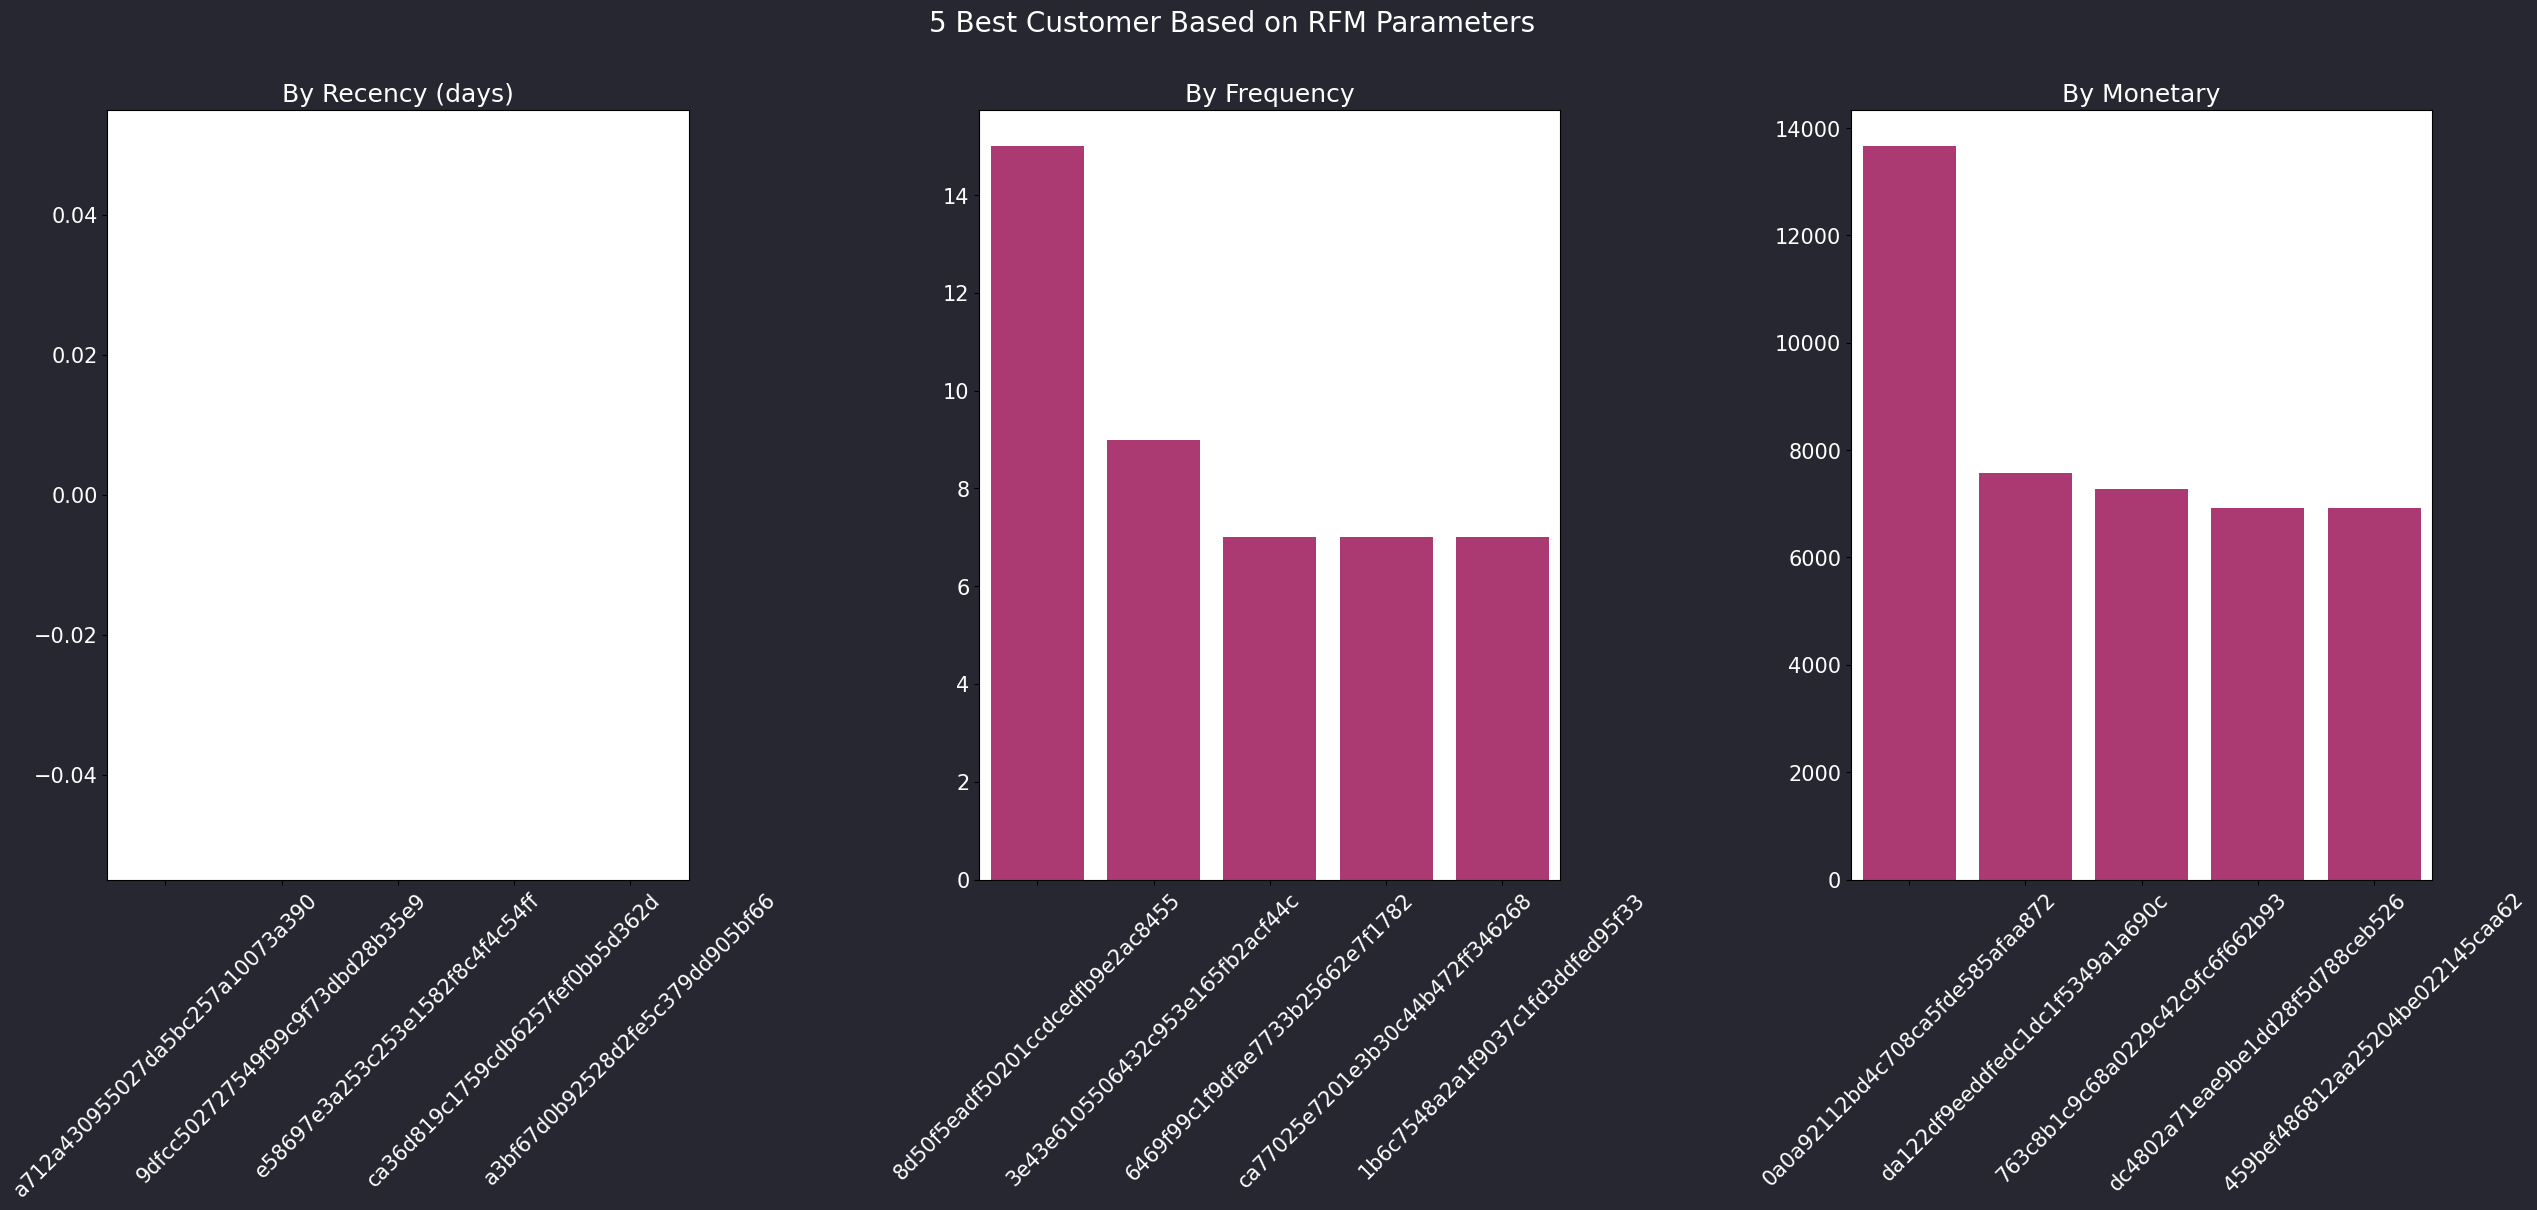

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
plt.subplots_adjust(wspace=0.5)

# recency
sns.barplot(x='customer_id', y='recency', data=rfm.sort_values(by='recency', ascending=True).head(5), color=main_color, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18, color='white')
ax[0].tick_params(axis = 'x', labelsize=15, labelcolor='white')
ax[0].tick_params(axis = 'y', labelsize=15, labelcolor='white')
ax[0].set_xticklabels(top_recency, rotation=45, color='white')

# frequancy
sns.barplot(x='customer_id', y='frequency', data=rfm.sort_values(by='frequency', ascending=False).head(5), color=main_color, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18, color='white')
ax[1].tick_params(axis = 'x', labelsize=15, labelcolor='white')
ax[1].tick_params(axis = 'y', labelsize=15, labelcolor='white')
ax[1].set_xticklabels(top_frequency, rotation=45, color='white')

# monetary
sns.barplot(x='customer_id', y='monetary', data=rfm.sort_values(by='monetary', ascending=False).head(5), color=main_color, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18, color='white')
ax[2].tick_params(axis = 'x', labelsize=15, labelcolor='white')
ax[2].tick_params(axis = 'y', labelsize=15, labelcolor='white')
ax[2].set_xticklabels(top_monetary, rotation=45, color='white')

plt.suptitle('5 Best Customer Based on RFM Parameters', fontsize=20, color='white')
plt.show()

### Pertanyaan 7: Berdasarkan Performa RFM, Bagaimana Distribusi Kategori Pelanggan?

In [77]:
customer_segmentation = rfm.groupby('customer_segment').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_segmentation.rename(columns={'customer_id':'customer_count'}, inplace=True)
customer_segmentation

,customer_segment,customer_count
0,Low Value Customers,60766
1,Medium Value Customers,21499
2,Lost Customers,9431
3,High Value Customers,1141
4,Top Customers,521


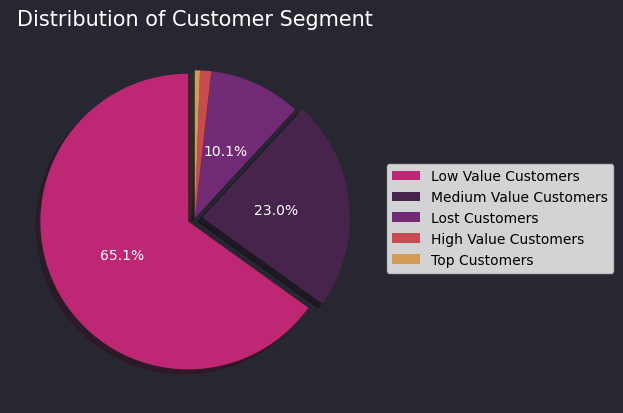

In [78]:
segments = customer_segmentation['customer_segment']
customer_counts = customer_segmentation['customer_count']
percentages = [count / sum(customer_counts) * 100 for count in customer_counts]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    customer_counts,
    labels=[None]*len(segments), 
    autopct='', 
    startangle=90, 
#     wedgeprops=dict(width=0.6), # donut
    pctdistance=0.5,
    shadow=True,
    explode=(0.05, 0.05, 0, 0, 0),
    colors=segment_colors
)
ax.legend(labels=segments, loc='center left', bbox_to_anchor=(1, 0.5))

# Menambahkan lingkaran di tengah untuk membuat donut chart
# centre_circle = plt.Circle((0,0),0.1,fc=background_color)
# ax.add_patch(centre_circle)

# Menambahkan label tengah
# ax.text(0, 0, 'Total\n100%', ha='center', va='center', fontsize=12, color='white')

for i, (segment, percentage) in enumerate(zip(segments, percentages)):
    if percentage > 10:
        autotexts[i].set_text(f'{percentage:.1f}%')
        autotexts[i].set_color('white')
# Menambahkan judul
ax.set_title('Distribution of Customer Segment', color='white', size=15)

plt.show()

## Conclusion

- Bagaimana Performa Penjualan Harian, Mingguan, dan Bulanan?
  
Berdasarkan hasil visualisasi, jumlah sales naik secara konsisten baik perbulan, perminggu, maupun perhari, dan pada tanggal 24 November memiliki jumlah penjualan yang sangat fanastis, hal ini dapat disebabkan oleh banyak faktor, seperti campaign, kebutuhan pelanggan, dll. Tentunya ini perlu dilakukan peninjauan lebih lanjut pada faktor-faktor yang mungkin dapat menyebabkan hal tersebut. 
Selain itu data tahun 2016 memiliki jumlah sales yang sangat sedikit.

- Kategori Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
  
Bed bath table menjadi kategori produk yang paling banyak terjual, dan kategori produk security and services yang paling sedikit terjual.

- Siapa Penjual Teratas yang Paling Banyak Menjual Produknya?
  
Penjual yang paling banyak menjual produknya adalah penjual dengan seller id '6560211a19b47992c3666cc44a7e94c0' dengan jumlah penjualan sebanyak 1819, kemudian kedua dengan seller id '4a3ca9315b744ce9f8e9374361493884' sebanyak 1772 penjualan, dan seterusnya.

- Siapa Saja Penjual yang Memiliki Performa Terbaik?

Dari hasil scoring berdasarkan skor review dan jumlah penjualan per seller dengan rasio 60:40 (skor review 60%, jumlah penjualan 40%), penjual dengan seller id '48efc9d94a9834137efd9ea76b065a38' memiliki rata-rata skor review 5.00, dan jumlah penjualan sebanyak 33 menduduki peringkat pertama, 	penjual dengan seller id 'd13e50eaa47b4cbe9eb81465865d8cfc' memiliki rata-rata skor review 4.81, dan jumlah penjualan sebanyak 66 menduduki peringkat kedua, dan seterusnya.

- Bagaimana Demografi dan Persebaran Lokasi Pelanggan?
  
Pelanggan terbanyak berada pada kota Sao Paulo, dan berdasarkan state, 'SP' adalah state/negara bagian dengan pelanggan paling banyak.
Jika dilihat pada peta persebaran pelanggan pada aplikasi/web yang dibuat dengan streamlit, pelanggan paling banyak berasal dari Brazil dan beberapa pelanggan berasal dari Argentina, Spanyol, Itali, dan Meksiko.   

- RFM Analysis(Kapan Terakhir Pelangggan Melakukan Pembelian, Seberapa Sering Pelanggan Melakukan Pembelian, dan Berapa Besar Total Nilai Uang yang Digunakan Pelanggan)?
  
Pelanggan terakhir yang melakukan transaksi adalah pelanggan dengan nomor customer_id 'a712a430955027da5bc257a10073a390'.
Pelanggan dengan order paling banyak adalah pelanggan dengan nomor customer_id '8d50f5eadf50201ccdcedfb9e2ac8455' dengan frekuensi 15.
Pelanggan dengan spending money (monetary) terbanyak adalah pelanggan dengan nomor customer_id '0a0a92112bd4c708ca5fde585afaa872' dengan dengan total
pembelanjaan sebesar 13664.08 Euro.

- Berdasarkan Performa RFM, Bagaimana Distribusi Kategori Pelanggan?
  
Dari hasil scoring dan segmentasi berdasarkan nilai RFM dengan rasio 20(recency):40(frequency):40(monetary), dengan range skor 1-5 didapati customer yang kita miliki didominasi oleh Low Value Customer (yang memiliki skor lebih dari 1.6) sebanyak 65.1%, Medium Value Customer sebanyak 23% (yang memiliki skor lebih dari 3), Lost Customer sebanyak 10,1% (yang memiliki skor kurang dari 1.6), dan sisanya High Value Customer dan Top Customer (yg memiliki skor lebih dari 4 dan lebih dari 4.5).